In [10]:
import numpy as np 
import pandas as pd
import seaborn as sns
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt


In [11]:
dados = pd.read_csv('ppp.csv')
dados['tempo'] = dados[' tempo']

C:\Users\Lucas\AppData\Local\Temp\ipykernel_30660\763973983.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


<Axes: xlabel='tempo', ylabel='temperatura atual'>

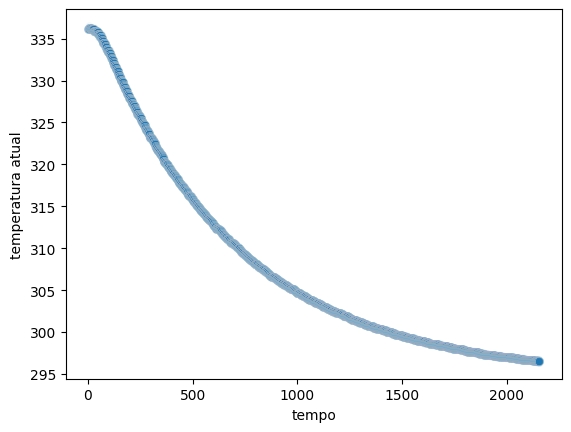

In [12]:
sns.scatterplot(
    x = 'tempo',
    y = 'temperatura atual',
    palette='Reds',
    alpha = 0.05,
    data=dados

)

In [19]:
def exponential_func(x, a, b, c):
    return a * np.exp(b * x) + c

dados = dados.dropna(subset=['tempo', 'temperatura atual'])

x_data = np.array(dados['tempo']).flatten()
y_data = np.array(dados['temperatura atual']).flatten()

if len(x_data) != len(y_data):
    raise ValueError(f"Tamanhos diferentes: x_data={len(x_data)}, y_data={len(y_data)}")

p0 = [100, -0.01, 300]  

params, covariance = curve_fit(exponential_func, x_data, y_data, p0=p0)
a, b, c = params

x_fit = np.linspace(min(x_data), max(x_data), 200)
y_fit = exponential_func(x_fit, a, b, c)

fit_data = pd.DataFrame({'tempo': x_fit, 'temperatura atual': y_fit})
print(f'({a})*({b})**(x) + {c}')

(44.25150968616372)*(-0.001469092523968599)**(x) + 294.6234956401889


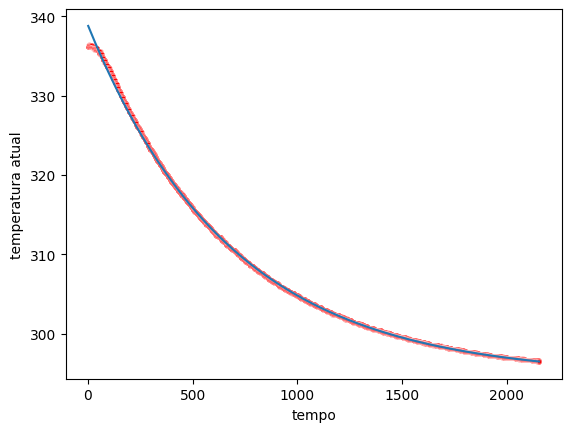

In [17]:
sns.lineplot(
    x= 'tempo',
    y = 'temperatura atual',
    data= fit_data
)

sns.scatterplot(
    x='tempo',
    y='temperatura atual',
    data=dados,
    color='red',
    alpha=0.3,
    s=10
)

plt.show()